

## **Introduction au projet**

### **Contexte et objectifs du projet**

La concentration d’ozone dans l’atmosphère est un indicateur clé de la qualité de l’air, influençant directement la santé publique et l’environnement. Ce projet a pour objectif de prédire la concentration d’ozone (**`maxO3`**) en fonction de différentes variables météorologiques et environnementales. Ces prévisions peuvent être utilisées pour améliorer la gestion de la qualité de l'air et prendre des mesures préventives en cas de niveaux élevés d’ozone.


**Les 13 variables observées sont :**

- 	MaxO3	:		Maximum de concentration d'ozone observé sur la journée 
-	T9, T12, T15 :	Température observée à 9, 12 et 15h 
-  	Ne9, Ne12, Ne15	: Nébulosité observée à 9, 12 et 15h
-  	Vx9, Vx12, Vx15	: Composante E-O du vent  à 9, 12 et 15h
-  	MaxO3v	:	ozone observée la veille
-  	vent	:		orientation du vent à 12h 
-  	pluie		:	occurrence ou non de précipitations

### **Étapes réalisées**

Le projet se divise en plusieurs étapes, allant du chargement et de la visualisation des données à la modélisation prédictive avec plusieurs techniques. Voici un aperçu des étapes réalisées :

1. **Chargement et visualisation initiale des données** :
   Les données ont été importées et visualisées pour identifier les tendances globales, détecter d’éventuelles anomalies, et mieux comprendre les relations entre les différentes variables.

2. **Étude empirique des données (EDA)** :
   L’analyse exploratoire des données a permis de comprendre les distributions des variables, d’identifier les outliers, et de calculer les corrélations entre les variables quantitatives et la cible (concentration d'ozone).

3. **Prétraitement des données** :
   Cette étape a couvert le traitement des valeurs aberrantes, l’encodage des variables qualitatives (telles que les conditions de pluie), la création de nouvelles variables, et la normalisation des données pour les rendre prêtes pour la modélisation.

4. **Modélisation** :
   Plusieurs modèles ont été utilisés pour prédire la concentration d'ozone, y compris la régression linéaire, la régression Ridge avec régularisation L2, la régression Lasso, KNN et le modèle **Random Forest**. Les performances de ces modèles ont été évaluées avec des métriques telles que **MSE** (Mean Squared Error) et **R²**.

5. **Optimisation des modèles** :
   Les hyperparamètres des modèles ont été optimisés grâce à des techniques telles que la validation croisée et la recherche sur grille pour améliorer la performance des prédictions.

### **Objectif du projet**

Ce projet vise à construire un modèle prédictif robuste pour estimer la concentration d’ozone, en utilisant les données météorologiques disponibles, et à fournir des insights clairs sur les facteurs qui influencent cette concentration.

---

 # Chargement et visualisation initiale des données


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('ozone.csv',sep=";")


In [3]:
df.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,"15,6","18,5","18,4",4,4,8,"0,6946","-1,7101","-0,6946",84,Nord,Sec
1,602,82,17,"18,4","17,7",5,5,7,"-4,3301",-4,-3,87,Nord,Sec
2,603,92,"15,3","17,6","19,5",2,5,4,"2,9544","1,8794","0,5209",82,Est,Sec
3,604,114,"16,2","19,7","22,5",1,1,0,"0,9848","0,3473","-0,1736",92,Nord,Sec
4,605,94,"17,4","20,5","20,4",8,8,7,"-0,5","-2,9544","-4,3301",114,Ouest,Sec


In [4]:
# Dimensions du dataset (nb de lignes et de colonnes)
print("Shape :", df.shape)


Shape : (112, 14)


In [5]:
# Types de données et présence de valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   obs     112 non-null    int64 
 1   maxO3   112 non-null    int64 
 2   T9      112 non-null    object
 3   T12     112 non-null    object
 4   T15     112 non-null    object
 5   Ne9     112 non-null    int64 
 6   Ne12    112 non-null    int64 
 7   Ne15    112 non-null    int64 
 8   Vx9     112 non-null    object
 9   Vx12    112 non-null    object
 10  Vx15    112 non-null    object
 11  maxO3v  112 non-null    int64 
 12  vent    112 non-null    object
 13  pluie   112 non-null    object
dtypes: int64(6), object(8)
memory usage: 12.4+ KB


In [6]:

# Statistiques descriptives sur les variables numériques
df.describe()

,obs,maxO3,Ne9,Ne12,Ne15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,763.205357,90.303571,4.928571,5.017857,4.830357,90.571429
std,110.149705,28.187225,2.594916,2.281860,2.332259,28.276853
min,601.000000,42.000000,0.000000,0.000000,0.000000,42.000000
25%,701.750000,70.750000,3.000000,4.000000,3.000000,71.000000
50%,729.500000,81.500000,6.000000,5.000000,5.000000,82.500000
75%,829.250000,106.000000,7.000000,7.000000,7.000000,106.000000
max,930.000000,166.000000,8.000000,8.000000,8.000000,166.000000


In [7]:
print(df.isnull().sum())


obs       0
maxO3     0
T9        0
T12       0
T15       0
Ne9       0
Ne12      0
Ne15      0
Vx9       0
Vx12      0
Vx15      0
maxO3v    0
vent      0
pluie     0
dtype: int64


# Étude empirique des données:

Objectifs :
Comprendre la distribution de chaque variable

Repérer les outliers, les corrélations

Identifier les liens entre les variables explicatives et la variable cible

### Nettoyage de base

In [8]:
# Remplacer les virgules par des points pour convertir les chaînes en float

dfcopy=df.copy()
colonnes_numeriques = ['T9', 'T12', 'T15', 'Vx9', 'Vx12', 'Vx15']
for col in colonnes_numeriques:
    dfcopy[col] = dfcopy[col].astype(str).str.replace(',', '.').astype(float)

# Vérifier que les colonnes sont bien numériques
dfcopy[colonnes_numeriques].dtypes


T9      float64
T12     float64
T15     float64
Vx9     float64
Vx12    float64
Vx15    float64
dtype: object

In [9]:
#La colonne obs contient simplement des numéros d'observation
#n’est pas une variable explicative (elle ne décrit pas la météo, l’ozone, le vent, etc.)

dfcopy = dfcopy.drop(columns=["obs"])
print(dfcopy.columns)  # Affiche la liste des colonnes restantes


Index(['maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12',
       'Vx15', 'maxO3v', 'vent', 'pluie'],
      dtype='object')


###  Analyse univariée (distributions) :



1-Variables Quantitavies:

Étudier chaque variable quantitative séparément pour comprendre sa distribution, ses statistiques descriptives, et détecter d’éventuels outliers ou problèmes de qualité.

In [10]:
#Lister les variables Quantitatives
quant_vars = dfcopy.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("Variables quantitatives :", quant_vars)

Variables quantitatives : ['maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15', 'maxO3v']


In [11]:
# Afficher les statistiques de base 
#voir l’ordre de grandeur,Détecter d’éventuels écarts anormaux ou données biaisées
dfcopy[quant_vars].describe()


,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429
std,28.187225,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853
min,42.000000,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000
25%,70.750000,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000
50%,81.500000,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000
75%,106.000000,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000
max,166.000000,27.000000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,5.000000,166.000000


In [12]:
# Comparaison entre moyenne et médiane
for var in quant_vars:
    moyenne = dfcopy[var].mean()
    mediane = dfcopy[var].median()
    print(f"{var} → Moyenne: {moyenne:.2f} | Médiane: {mediane:.2f} | Écart: {abs(moyenne - mediane):.2f}")


maxO3 → Moyenne: 90.30 | Médiane: 81.50 | Écart: 8.80
T9 → Moyenne: 18.36 | Médiane: 17.80 | Écart: 0.56
T12 → Moyenne: 21.53 | Médiane: 20.55 | Écart: 0.98
T15 → Moyenne: 22.63 | Médiane: 22.05 | Écart: 0.58
Ne9 → Moyenne: 4.93 | Médiane: 6.00 | Écart: 1.07
Ne12 → Moyenne: 5.02 | Médiane: 5.00 | Écart: 0.02
Ne15 → Moyenne: 4.83 | Médiane: 5.00 | Écart: 0.17
Vx9 → Moyenne: -1.21 | Médiane: -0.87 | Écart: 0.35
Vx12 → Moyenne: -1.61 | Médiane: -1.88 | Écart: 0.27
Vx15 → Moyenne: -1.69 | Médiane: -1.55 | Écart: 0.14
maxO3v → Moyenne: 90.57 | Médiane: 82.50 | Écart: 8.07


| **Variables**                     | **Distribution**       | **Observation / Interprétation**                                                        |
| --------------------------------- | ---------------------- | --------------------------------------------------------------------------------------- |
| `maxO3`, `maxO3v`                 | Asymétrique à droite   | Moyenne > Médiane → Indique la présence de **valeurs élevées** (outliers) à surveiller. |
| `T9`, `T12`, `T15` (températures) | Symétrique             | Moyenne ≈ Médiane → Données **centrées**, pas de déséquilibre.                          |
| `Ne12`, `Ne15`                    | Équilibrée             | Distributions **stables**, pas de signe de déséquilibre.                                |
| `Ne9`                             | Légèrement asymétrique | Légère **asymétrie** → Peut contenir quelques valeurs extrêmes ou déséquilibre discret. |
| `Vx9`, `Vx12`, `Vx15`             | Symétrique et centrée  | Variables **stables autour de 0**, pas de problème de distribution observé.             |


In [13]:
#Ecart type Donne une mesure de dispersion :
#  à quel point les valeurs sont éloignées de la moyenne
for var in quant_vars:
    sd = dfcopy[var].std()
    print(f"{var} → Ecart type : {sd:.2f} ")


maxO3 → Ecart type : 28.19 
T9 → Ecart type : 3.12 
T12 → Ecart type : 4.04 
T15 → Ecart type : 4.53 
Ne9 → Ecart type : 2.59 
Ne12 → Ecart type : 2.28 
Ne15 → Ecart type : 2.33 
Vx9 → Ecart type : 2.63 
Vx12 → Ecart type : 2.80 
Vx15 → Ecart type : 2.81 
maxO3v → Ecart type : 28.28 


| **Variables**         | **Écart-type (env.)** | **Dispersion** | **Interprétation**                                                                 |
| --------------------- | --------------------- | -------------- | ---------------------------------------------------------------------------------- |
| `maxO3`, `maxO3v`     | \~28                  | Élevée         | Très grande variabilité, **pics d’ozone** à surveiller (**outliers** possibles).   |
| `T9`, `T12`, `T15`    | 3–4.5                 | Modérée        | Températures **bien centrées**, variation modérée, comportement **cohérent**.      |
| **`Ne9`**             | **2.59**              | **Modérée**    | Dispersion **plus élevée** que `Ne12` et `Ne15`, à **surveiller**.                 |
| `Ne12`, `Ne15`        | \~2.3                 | Faible         | Distributions **stables et concentrées**, typiques d’une échelle en octas.         |
| `Vx9`, `Vx12`, `Vx15` | 2.6–2.8               | Modérée        | Composantes du vent **centrées autour de 0**, dispersion normale, rien d’alarmant. |


###  Visualisation : 

histogrammes

But : observer la forme de la distribution

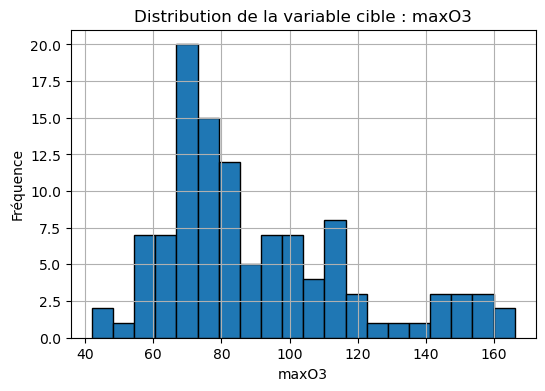

In [14]:
# Distribution de la variable cible
plt.figure(figsize=(6, 4))
plt.hist(dfcopy['maxO3'], bins=20, edgecolor='black')
plt.title("Distribution de la variable cible : maxO3")
plt.xlabel("maxO3")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


-Distribution asymétrique à droite (longue traîne vers les hautes valeurs).

La majorité des valeurs sont entre 60 et 100 µg/m³, avec quelques pics élevés (>140) → présence d’outliers.

Cela peut fausser les moyennes et nécessite éventuellement une transformation ou normalisation avant modélisation.

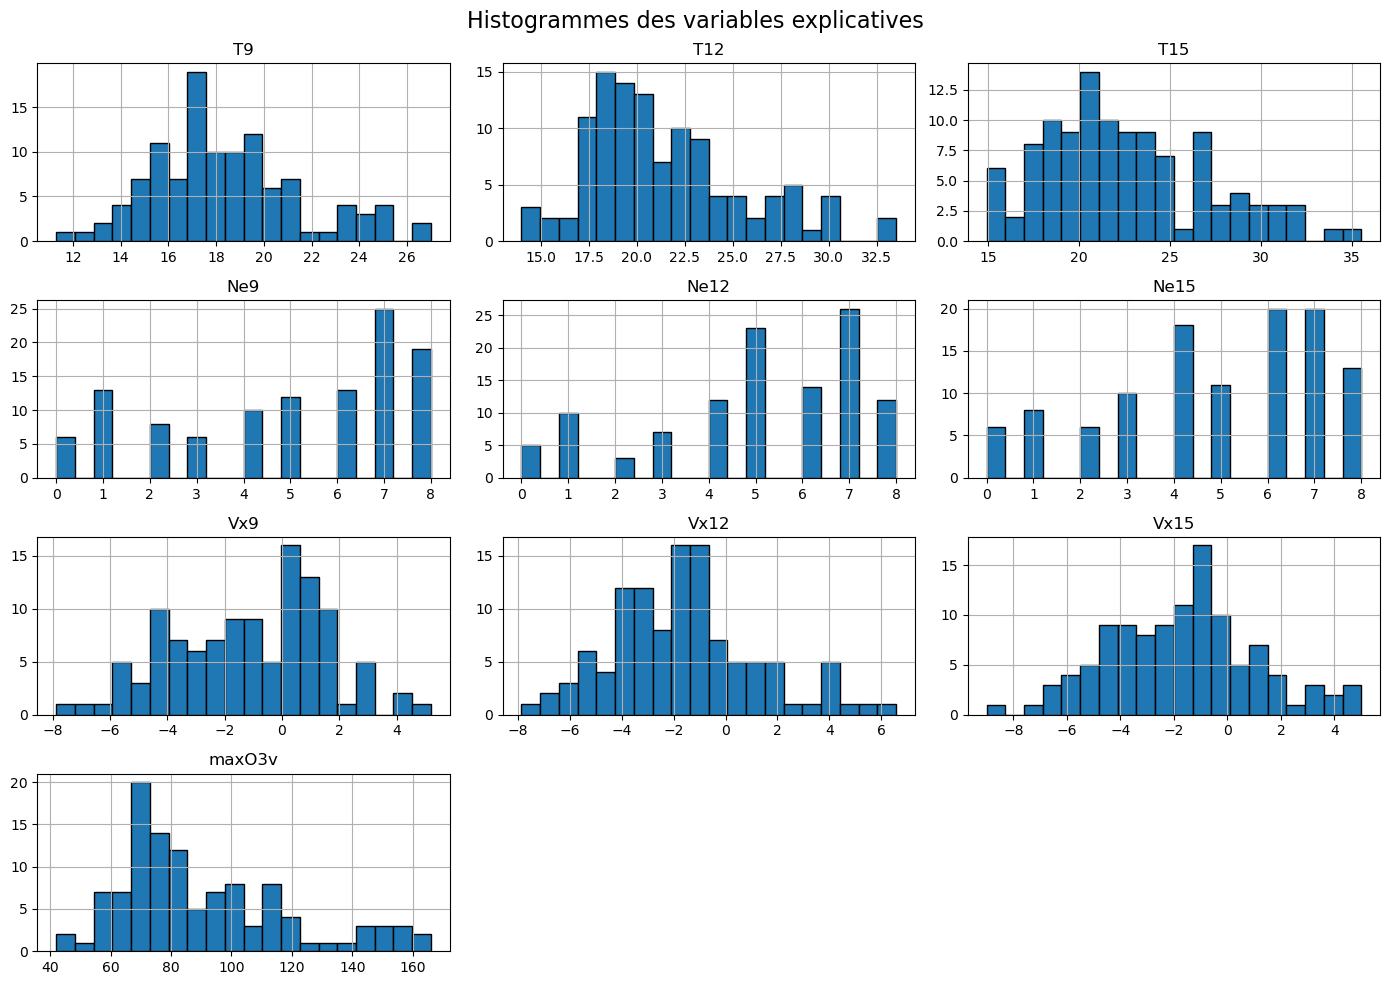

In [15]:
# Distributions des variables explicatives 
explicatives = [var for var in quant_vars if var != "maxO3"]

dfcopy[explicatives].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histogrammes des variables explicatives", fontsize=16)
plt.tight_layout()
plt.show()



* Températures (T9, T12, T15) : distributions gaussiennes (symétriques), bien réparties.

* Nébulosité (Ne9, Ne12, Ne15) : distributions discrètes et irrégulières, présence de valeurs fréquentes à 0 et 8 → probablement codées en octas (échelle météo).

* Vent (Vx9, Vx12, Vx15) : distributions asymétriques, centrées autour de 0 → conforme à une composante vectorielle.

* maxO3v : ressemble à maxO3 → même asymétrie à droite → corrélation probable avec la cible.



Boxplots: 

but:


Comparer la variabilité  selon l’heure (matin vs après-midi)

Détecter s’il y a des valeurs anormales ou asymétries

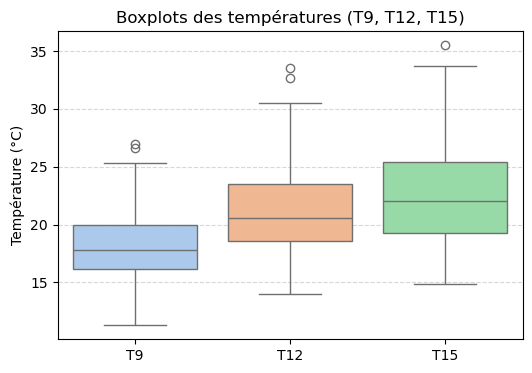

In [16]:
#température 
plt.figure(figsize=(6, 4))
sns.boxplot(data=dfcopy[['T9', 'T12', 'T15']], palette="pastel")
plt.title("Boxplots des températures (T9, T12, T15)")
plt.ylabel("Température (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


La médiane augmente progressivement : matin (T9) < midi (T12) < après-midi (T15) → ce qui est logique.

On voit quelques valeurs très hautes (au-dessus de 30–35°C) → ce sont des jours anormalement chauds (outliers).



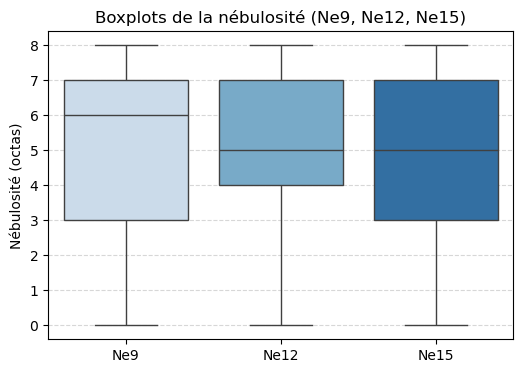

In [17]:
#Nébulosité
plt.figure(figsize=(6, 4))
sns.boxplot(data=dfcopy[['Ne9', 'Ne12', 'Ne15']], palette="Blues")
plt.title("Boxplots de la nébulosité (Ne9, Ne12, Ne15)")
plt.ylabel("Nébulosité (octas)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


* Ne9 présente une plus grande dispersion (IQR large, moustaches longues), ce qui indique une variabilité élevée des observations.
La dispersion  forte de Ne9 pourrait nécessiter une normalisation pour les modéles sensibles à l'échelle de données ( regression linéaire , knn)

* Ne12 et Ne15 ont des distributions plus resserrées, sans asymétrie marquée.
* Aucun outlier détecté


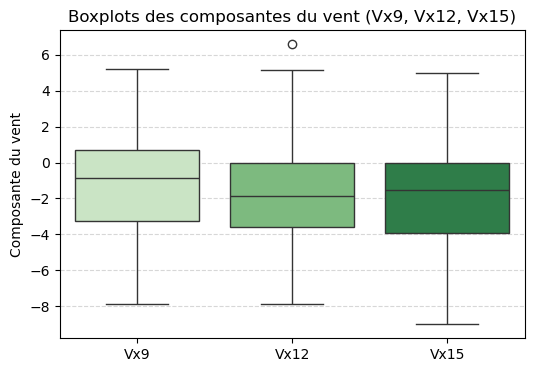

In [18]:
#vent 
plt.figure(figsize=(6, 4))
sns.boxplot(data=dfcopy[['Vx9', 'Vx12', 'Vx15']], palette="Greens")
plt.title("Boxplots des composantes du vent (Vx9, Vx12, Vx15)")
plt.ylabel("Composante du vent")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


* Les trois variables ont une dispersion modérée, avec des moustaches bien étendues, indiquant une bonne variabilité des données.

* Les médianes sont légèrement négatives, ce qui suggère une asymétrie légère (biais directionnel).

* Un seul outlier visible dans Vx12 (> 6), les autres distributions sont propres.

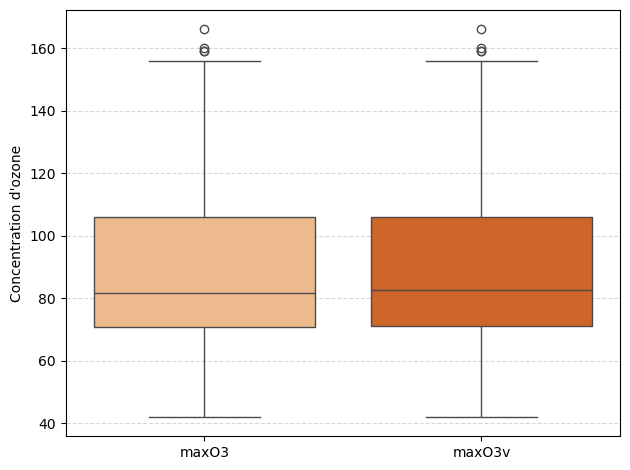

In [19]:

sns.boxplot(data=dfcopy[['maxO3', 'maxO3v']], palette="Oranges")

plt.ylabel("Concentration d'ozone")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


maxO3 et maxO3v ont un comportement très proche : distributions larges, avec des valeurs extrêmes similaires → cela confirme une forte corrélation possible à explorer par scatterplot ou matrice de corrélation.

2-Les variables qualitatives:

In [20]:
# Fréquence de chaque modalité
print(dfcopy['vent'].value_counts())
print(dfcopy['pluie'].value_counts())


vent
Ouest    50
Nord     31
Sud      21
Est      10
Name: count, dtype: int64
pluie
Sec      69
Pluie    43
Name: count, dtype: int64


In [21]:
# Moyenne maxO3 selon vent
print(dfcopy.groupby('vent')['maxO3'].mean())

# Moyenne maxO3 selon pluie
print(dfcopy.groupby('pluie')['maxO3'].mean())


vent
Est      105.600000
Nord      86.129032
Ouest     84.700000
Sud      102.523810
Name: maxO3, dtype: float64
pluie
Pluie     73.395349
Sec      100.840580
Name: maxO3, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_13084\2010300746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfcopy, x='pluie', palette='pastel')


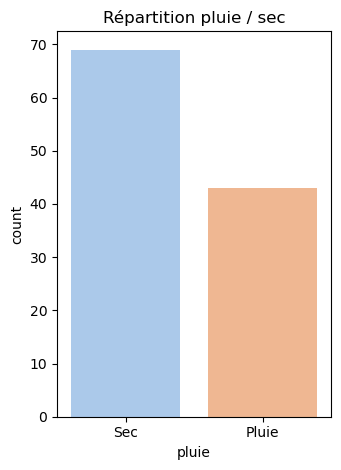

In [22]:
# Barplot pour pluie
plt.subplot(1, 2, 2)
sns.countplot(data=dfcopy, x='pluie', palette='pastel')
plt.title("Répartition pluie / sec")

plt.tight_layout()
plt.show()


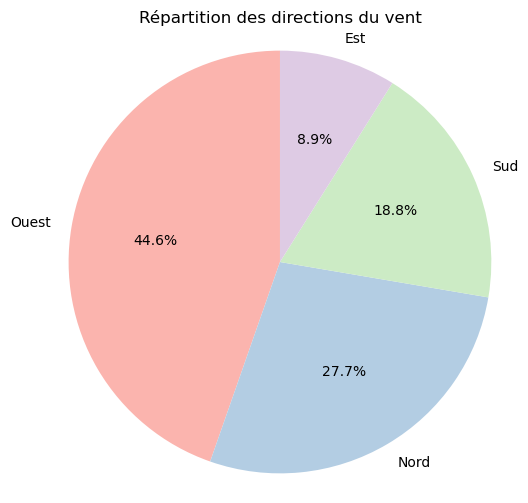

In [23]:
#cambembert pour vent puisque il contient bcp de modaltés

vent_counts = dfcopy['vent'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(vent_counts, labels=vent_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Répartition des directions du vent")
plt.axis('equal')  # Cercle parfait
plt.show()


### L’analyse bivariée 

Les variables Quantitatives: 
but:
* Examiner la relation linéaire ou non entre maxO3 et les autres variables quantitatives.

* Détecter des corrélations fortes ou des patterns intéressants.

* Visualiser ces relations avec des scatterplots et calculer des coefficients de corrélation.

In [24]:
#calcul de la corrélation de Pearson  (r = ( cov(x,y)/ecartype X * ecartype y ))

#1 Sélection des variables quantitatives explicatives (hors cible)
quant_vars_exp = [var for var in quant_vars if var != 'maxO3']

#Calcul de la matrice de corrélation:
#On crée un sous-DataFrame qui contient toutes les variables explicatives 
# plus la cible maxO3.

#La méthode .corr() calcule la matrice de corrélation de Pearson entre 
# toutes ces variables.

#Le résultat corrs est un tableau carré où chaque case contient la corrélation
#  entre deux variables.

corrs = dfcopy[quant_vars_exp + ['maxO3']].corr()

#3. Extraction des corrélations avec maxO3
#corrs['maxO3'] récupère la colonne de la matrice correspondant
#  aux corrélations avec maxO3.

#.drop('maxO3') enlève la corrélation de la variable avec elle-même 
# (toujours égale à 1).
corr_maxO3 = corrs['maxO3'].drop('maxO3').sort_values(ascending=False)

print("Corrélations de Pearson avec maxO3 :")
print(corr_maxO3)


Corrélations de Pearson avec maxO3 :
T12       0.784262
T15       0.774570
T9        0.699387
maxO3v    0.684516
Vx9       0.527623
Vx12      0.430796
Vx15      0.391899
Ne15     -0.478302
Ne9      -0.621704
Ne12     -0.640751
Name: maxO3, dtype: float64


Puisque la corrélation de Pearson est sensible aux outliers et puisque ma varible cible est asymétrique à gauche cette corrélation peut etre moins fiable donc on va essayer la corrélation de Spearman Comme elle utilise les rangs et non les valeurs brutes, elle est moins sensible aux asymétries et à la non-normalité.

In [25]:

# 1. Sélection des variables explicatives numériques + cible maxO3
quant_vars_exp = [var for var in quant_vars if var != 'maxO3']
numeric_df = dfcopy[quant_vars_exp + ['maxO3']]

# 2. Calcul de la matrice de corrélation de Spearman
spearman_corr = numeric_df.corr(method='spearman')

print("\nCorrélation de Spearman avec maxO3 :")
print(spearman_corr['maxO3'])



Corrélation de Spearman avec maxO3 :
T9        0.550728
T12       0.619463
T15       0.656584
Ne9      -0.555908
Ne12     -0.576644
Ne15     -0.481814
Vx9       0.597659
Vx12      0.511795
Vx15      0.410765
maxO3v    0.659290
maxO3     1.000000
Name: maxO3, dtype: float64


* Températures (T9, T12, T15) : corrélations modérées à fortes positives avec maxO3 — plus il fait chaud, plus l’ozone est élevé.

* Nébulosité (Ne9, Ne12, Ne15) : corrélations modérées négatives — plus de nuages, moins d’ozone.

* Vent (Vx9, Vx12, Vx15) : corrélations positives modérées — le vent favorise l’augmentation d’ozone.

* maxO3v : forte corrélation positive

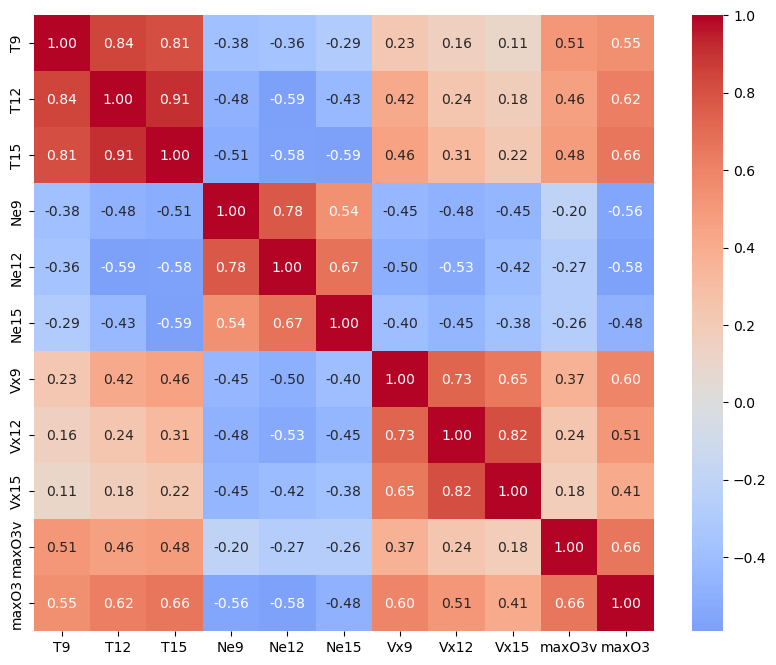

In [26]:
# Affichage de la heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()

Multicolinéarité détectée 
ce heatmap suggère clairement la présence de multicolinéarité, notamment :
* Les variables T9, T12, T15 sont très fortement corrélées entre elles (0.81 à 0.91).
* Les variables Ne9, Ne12, Ne15 aussi (0.54 à 0.78).
* Les variables Vx9, Vx12, Vx15 également (0.65 à 0.82).

Corrélations négatives entre T et Ne :
*Les variables Ne9, Ne12, Ne15 sont négativement corrélées avec T9, T12, T15 (autour de -0.29 à -0.59).

Cela suggère que quand la température augmente, les valeurs Ne* diminuent (et inversement).

Les variables qualitative :

* Étudier comment la variable cible maxO3 varie en fonction des catégories des variables qualitatives (vent, pluie)
* Repérer des différences significatives entre modalités (ex : est-ce que l’ozone est plus élevé avec un vent particulier ou par temps sec ?).

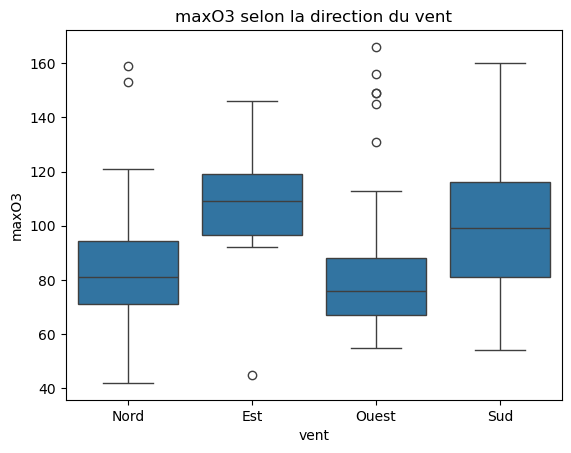

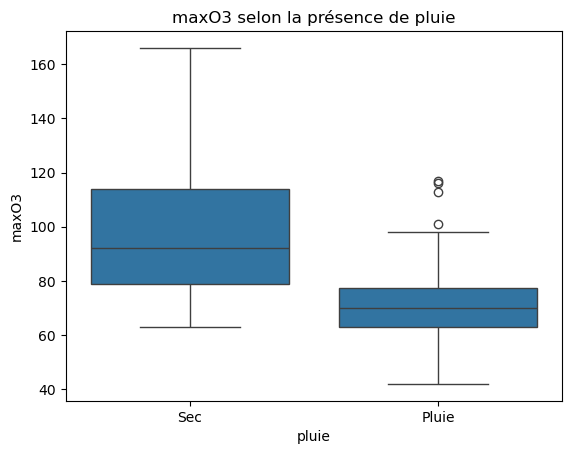

In [27]:
sns.boxplot(x='vent', y='maxO3', data=dfcopy)
plt.title("maxO3 selon la direction du vent")
plt.show()

sns.boxplot(x='pluie', y='maxO3', data=dfcopy)
plt.title("maxO3 selon la présence de pluie")
plt.show()



* Le niveau maximal d’ozone (**maxO3**) varie selon la direction du vent.
* **Est** a la médiane la plus élevée (\~110), donc tendance à plus d’ozone.
* **Sud** montre une large dispersion des valeurs, avec des niveaux très variables.
* **Ouest** a la médiane la plus basse (\~75) mais quelques valeurs extrêmes très hautes.
* **Nord** présente une médiane intermédiaire (\~80) avec quelques outliers élevés.




* Le niveau maximal d’ozone (**maxO3**) est plus élevé et plus variable quand il ne pleut pas (Sec).
* Quand il pleut (Pluie), **maxO3** est généralement plus bas et moins dispersé.
* La pluie réduit donc la concentration d’ozone dans l’air.


# Prétraitement des Données


## Traitement des outliers


D'aprés les boxplots dans l'EDA phase on a constaté la présence d'outliers dans maxO3, maxO3v, T12, T15 
 pour s'assurer on va utiliser la méthode  Méthode de l’IQR (Interquartile Range) pour repérer les valeurs aberrantes 

In [28]:
numerical_vars = ['maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15','maxO3v']

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in numerical_vars:
    outliers = detect_outliers_iqr(dfcopy, col)
    print(f"{col} : {len(outliers)} outliers détectés")


maxO3 : 4 outliers détectés
T9 : 2 outliers détectés
T12 : 2 outliers détectés
T15 : 1 outliers détectés
Ne9 : 0 outliers détectés
Ne12 : 0 outliers détectés
Ne15 : 0 outliers détectés
Vx9 : 0 outliers détectés
Vx12 : 1 outliers détectés
Vx15 : 0 outliers détectés
maxO3v : 4 outliers détectés


In [29]:
import numpy as np

# pour maxO3 et maxO3v on va procéder à une log transformation puisque la distrubution est décalé à droite 
df_corrected=dfcopy.copy()
df_corrected['maxO3'] = np.log(df_corrected['maxO3'] )
df_corrected['maxO3v'] = np.log(df_corrected['maxO3v'])

In [30]:
#Traitement des outliers pour T9, T12, T15, Vx12
def winsoriser(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Liste des variables à traiter
vars_to_treat = ['T9', 'T12', 'T15', 'Vx12']

# Appliquer la winsorisation sur df_corrected
for var in vars_to_treat:
    df_corrected = winsoriser(df_corrected, var)

# Vérification des statistiques après traitement
print(df_corrected[vars_to_treat].describe())
dfcopy[vars_to_treat].describe()


               T9         T12         T15        Vx12
count  112.000000  112.000000  112.000000  112.000000
mean    18.337723   21.488839   22.619531   -1.621992
std      3.064062    3.940958    4.508268    2.765451
min     11.300000   14.000000   14.900000   -7.878500
25%     16.200000   18.600000   19.275000   -3.564700
50%     17.800000   20.550000   22.050000   -1.879400
75%     19.925000   23.550000   25.400000    0.000000
max     25.512500   30.975000   34.587500    5.347050


,T9,T12,T15,Vx12
count,112.000000,112.000000,112.000000,112.000000
mean,18.360714,21.526786,22.627679,-1.611004
std,3.122726,4.042321,4.530859,2.795673
min,11.300000,14.000000,14.900000,-7.878500
25%,16.200000,18.600000,19.275000,-3.564700
50%,17.800000,20.550000,22.050000,-1.879400
75%,19.925000,23.550000,25.400000,0.000000
max,27.000000,33.500000,35.500000,6.577800


## Encodage des variables qualitatives




In [31]:
# One-Hot Encoding des variables catégorielles
df_encoded = pd.get_dummies(df_corrected, columns=['vent', 'pluie'], drop_first=False)

# Affichage des premières lignes pour vérifier
print(df_encoded.head())


      maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12    Vx15  \
0  4.465908  15.6  18.5  18.4    4     4     8  0.6946 -1.7101 -0.6946   
1  4.406719  17.0  18.4  17.7    5     5     7 -4.3301 -4.0000 -3.0000   
2  4.521789  15.3  17.6  19.5    2     5     4  2.9544  1.8794  0.5209   
3  4.736198  16.2  19.7  22.5    1     1     0  0.9848  0.3473 -0.1736   
4  4.543295  17.4  20.5  20.4    8     8     7 -0.5000 -2.9544 -4.3301   

     maxO3v  vent_Est  vent_Nord  vent_Ouest  vent_Sud  pluie_Pluie  pluie_Sec  
0  4.430817     False       True       False     False        False       True  
1  4.465908     False       True       False     False        False       True  
2  4.406719      True      False       False     False        False       True  
3  4.521789     False       True       False     False        False       True  
4  4.736198     False      False        True     False        False       True  


 ## Création/Sélection de nouvelles features 

Pour les variables quantitatives:


In [32]:
# Moyenne des températures T9, T12 et T15 pour avoir une température moyenne
df_encoded['T_mean'] = df_encoded[['T9', 'T12', 'T15']].mean(axis=1)

# Création de la moyenne pour les variables Ne9, Ne12, Ne15
df_encoded['Ne_mean'] = df_encoded[['Ne9', 'Ne12', 'Ne15']].mean(axis=1)

# Création de la moyenne pour les variables Vx9, Vx12, Vx15
df_encoded['Vx_mean'] = df_encoded[['Vx9', 'Vx12', 'Vx15']].mean(axis=1)

# Calcul de la différence entre le niveau d'ozone actuel et celui de la veille
#capture la variation (augmentation ou baisse) du niveau d’ozone d’un jour sur l’autre.
df_encoded['Ozone_diff'] = df_encoded['maxO3'] - df_encoded['maxO3v']

# Supprimer les anciennes variables T9, T12, T15, Vx9, Vx12, Vx15, Ne9, Ne12, Ne15
df_encoded_cleaned = df_encoded.drop(columns=['T9', 'T12', 'T15', 'Vx9', 'Vx12', 'Vx15', 'Ne9', 'Ne12', 'Ne15'])

df_encoded_cleaned.head()

,maxO3,maxO3v,vent_Est,vent_Nord,vent_Ouest,vent_Sud,pluie_Pluie,pluie_Sec,T_mean,Ne_mean,Vx_mean,Ozone_diff
0,4.465908,4.430817,False,True,False,False,False,True,17.500000,5.333333,-0.570033,0.035091
1,4.406719,4.465908,False,True,False,False,False,True,17.700000,5.666667,-3.776700,-0.059189
2,4.521789,4.406719,True,False,False,False,False,True,17.466667,3.666667,1.784900,0.115069
3,4.736198,4.521789,False,True,False,False,False,True,19.466667,0.666667,0.386167,0.214410
4,4.543295,4.736198,False,False,True,False,False,True,19.433333,7.666667,-2.594833,-0.192904


Remarque : 

-maxO3v : valeur absolue de l’ozone mesurée la veille — c’est une variable directe qui reflète la persistance temporelle de l’ozone.

-Ozone_diff = maxO3 - maxO3v : différence entre ozone du jour et de la veille capture la variation (augmentation ou baisse) du niveau d’ozone d’un jour sur l’autre.

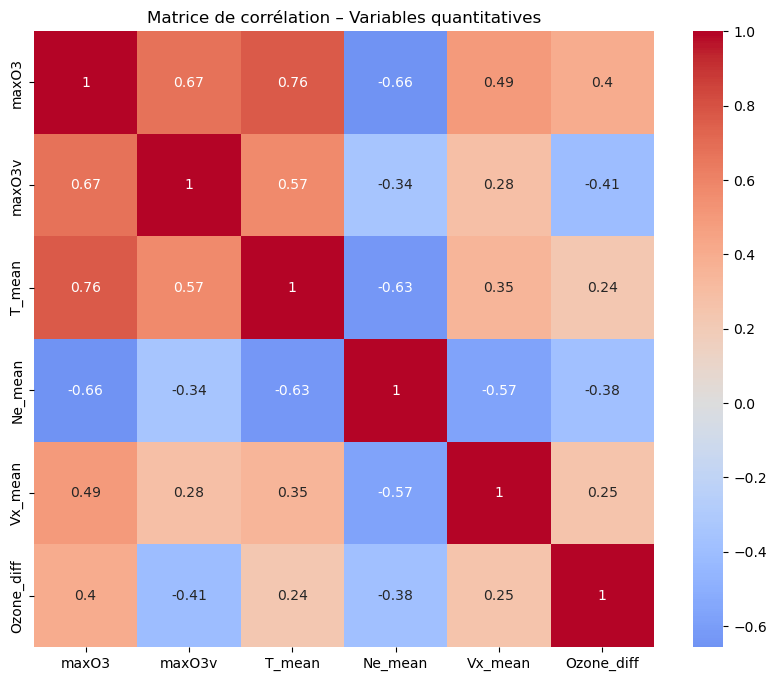

In [33]:
quantitative_vars = ['maxO3', 'maxO3v', 'T_mean', 'Ne_mean', 'Vx_mean', 'Ozone_diff']

df_quant = df_encoded_cleaned[quantitative_vars]

corr_matrix = df_quant.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation – Variables quantitatives')
plt.show()

| Variables                | Corrélation clé | Interprétation principale                              |
| ------------------------ | --------------- | ------------------------------------------------------ |
| **maxO3 - T\_mean**      | +0.76           | Plus la température est élevée, plus l’ozone augmente  |
| **maxO3 - Ne\_mean**     | -0.66           | Plus il y a de nuages, moins il y a d’ozone            |
| **maxO3 - maxO3v**       | +0.67           | L’ozone du jour est proche de celui de la veille       |
| **maxO3 - Vx\_mean**     | +0.49           | Le vent a un effet modéré sur l’ozone                  |
| **T\_mean - Ne\_mean**   | -0.63           | Température élevée associée à moins de nuages          |
| **Ozone\_diff - maxO3v** | -0.41           | Variation de l’ozone inversement liée à l’ozone veille |
| **Ozone\_diff - maxO3**  | +0.40           | Variation de l’ozone d’un jour à l’autre               |



 une forte corrélation négative c entre T_mean et Ne_mean (environ -0.63) peut potentiellement entraîner de la multicolinéarité , aussi ozonediff et maxO3  .si on utilise un modèle linéaire donc on va donc proceder à VIF pour bien choisr les features 

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionne les variables explicatives que tu veux tester
Xvif = df_encoded_cleaned[['T_mean', 'Ne_mean', 'maxO3v', 'Vx_mean', 'Ozone_diff']]

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = Xvif.columns
vif_data['VIF'] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]

print(vif_data)


     Variable         VIF
0      T_mean   83.375194
1     Ne_mean   12.401678
2      maxO3v  119.390021
3     Vx_mean    2.087072
4  Ozone_diff    1.287363


-maxO3v a un VIF énorme, ce qui signifie qu'elle est quasiment redondante avec d'autres variables (probablement T_mean et/ou Ne_mean et/ou Ozone_diff).



In [35]:
#recalculer le VIF sans maxO3v
X_reduced = df_encoded_cleaned[['T_mean', 'Ne_mean', 'Vx_mean', 'Ozone_diff']]

vif_data_reduced = pd.DataFrame()
vif_data_reduced['Variable'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_reduced)


     Variable       VIF
0      T_mean  4.706485
1     Ne_mean  6.568228
2     Vx_mean  2.005834
3  Ozone_diff  1.162464


#### Choix de selection :
 garder ces 4 variables 


In [36]:
df_final=df_encoded_cleaned.copy()
df_final = df_final.drop(columns='maxO3v')
df_final.head(100)

,maxO3,vent_Est,vent_Nord,vent_Ouest,vent_Sud,pluie_Pluie,pluie_Sec,T_mean,Ne_mean,Vx_mean,Ozone_diff
0,4.465908,False,True,False,False,False,True,17.500000,5.333333,-0.570033,0.035091
1,4.406719,False,True,False,False,False,True,17.700000,5.666667,-3.776700,-0.059189
2,4.521789,True,False,False,False,False,True,17.466667,3.666667,1.784900,0.115069
3,4.736198,False,True,False,False,False,True,19.466667,0.666667,0.386167,0.214410
4,4.543295,False,False,True,False,False,True,19.433333,7.666667,-2.594833,-0.192904
...,...,...,...,...,...,...,...,...,...,...,...
95,4.304065,False,False,True,False,True,False,17.866667,7.333333,-6.335833,-0.052644
96,4.262680,False,True,False,False,True,False,17.233333,4.000000,-1.150633,-0.041385
97,4.234107,False,True,False,False,True,False,17.433333,7.000000,-2.991433,-0.028573
98,4.262680,False,True,False,False,False,True,16.566667,4.666667,-0.813667,0.028573


#### Séparation Train/Test



In [37]:
from sklearn.model_selection import train_test_split

# Séparer variables explicatives et cible
X = df_final.drop(columns=['maxO3'])
y = df_final['maxO3']

# Diviser en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Afficher la taille des datasets
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 89 samples
Test set size: 23 samples


### Standarisation des donnés numérriques des variables explicatives


In [38]:
#Standarisation des donnés numérriques des variables explicatives
from sklearn.preprocessing import StandardScaler
num_cols = ['T_mean', 'Ne_mean', 'Vx_mean', 'Ozone_diff']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
 

### Régression linéaire


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# Initialiser le modèle
lr_model = LinearRegression()

# Entraîner sur le train
lr_model.fit(X_train, y_train)

# Prédire sur test
y_pred = lr_model.predict(X_test)

# Évaluer la performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, lr_model.predict(X_test))

print("Performance de modele Régression Linéaire :")
print(f"MSE : {mse:.4f}\n R2 : {r2:.4f}\n MAE : {mae_lr:.4f}")




Performance de modele Régression Linéaire :
MSE : 0.0273
 R2 : 0.6319
 MAE : 0.1384


Régularisation avec Ridge L2

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# Définir la liste des alpha à tester
alphas = np.logspace(-3, 3, 100)  # valeurs de 10^-3 à 10^3

# Instancier RidgeCV avec validation croisée 10-fold
ridge_cv = RidgeCV(alphas=alphas, cv=10)

# Entraîner sur le train
ridge_cv.fit(X_train, y_train)


# Prédiction sur le test
y_pred_cv = ridge_cv.predict(X_test)

# Évaluation
print("MSE :", mean_squared_error(y_test, y_pred_cv))
print("R² :", r2_score(y_test, y_pred_cv))


MSE : 0.02769017730321286
R² : 0.627188886863749


### optimisation de l’hyperparamètre alpha de Ridge avec GridSearchCV 


In [41]:
from sklearn.model_selection import GridSearchCV

# Instancier le modèle Ridge
ridge = Ridge()

# Grille des valeurs alpha à tester
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200]}

# Configurer GridSearchCV avec validation croisée 5-fold et MSE comme critère
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Lancer la recherche sur le train
grid_search.fit(X_train, y_train)

# Afficher le meilleur alpha et le meilleur score moyen sur les folds
print("Meilleur alpha :", grid_search.best_params_['alpha'])
print("Meilleur score MSE (CV) :", -grid_search.best_score_)

# Meilleur modèle
best_ridge = grid_search.best_estimator_

# Prédiction sur test
y_pred = best_ridge.predict(X_test)

# Évaluer le modèle sur test
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test MSE : {mse_test:.4f}")
print(f"Test R2 : {r2_test:.4f}")


Meilleur alpha : 1
Meilleur score MSE (CV) : 0.02827407270783161
Test MSE : 0.0272
Test R2 : 0.6337


Presque meme performance que la régression classique

Regression Lasso avec cross validation

In [42]:
from sklearn.linear_model import LassoCV

# Définir la liste des alpha à tester (100 valeurs entre 10^-3 et 10^3)
alphas = np.logspace(-3, 3, 100)

# Instancier LassoCV avec validation croisée 10-fold
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42, max_iter=10000)

# Entraîner sur le train
lasso_cv.fit(X_train, y_train)


# Prédiction sur le test
y_pred_lasso = lasso_cv.predict(X_test)

# Évaluation
print("MSE :", mean_squared_error(y_test, y_pred_lasso))
print("R² :", r2_score(y_test, y_pred_lasso))




MSE : 0.026877799179256784
R² : 0.6381264691465631


Trés légement amélioré à la regression classique

-On va donc extraire les coefficients our comprendre l’impact des features de notre modèle Lasso et bien tirer des conclusions 

In [43]:
coefficients = lasso_cv.coef_

for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")


vent_Est: -0.1369
vent_Nord: -0.0309
vent_Ouest: 0.0444
vent_Sud: 0.0000
pluie_Pluie: -0.0910
pluie_Sec: 0.0000
T_mean: 0.1474
Ne_mean: -0.0524
Vx_mean: 0.0623
Ozone_diff: 0.0477


* Certaines variables catégorielles comme vent_Sud et pluie_Sec ont été complètement éliminées (coefficients nuls), donc peu utiles dans ce modèle.

* T_mean est la variable la plus influente, ce qui confirme son rôle central.

* Lasso a aussi conservé des variables météorologiques importantes (pluie, vent, nébulosité) avec des coefficients cohérents avec la physique du phénomène.

## KNN

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


# Charger les données (X_train, y_train doivent être déjà définis)

# Instancier le modèle KNN (régression)
knn_model = KNeighborsRegressor()

# Validation croisée (avec 10-fold) pour évaluer la performance du modèle
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Afficher les résultats de la validation croisée
print(f"Validation croisée (MSE) : {cv_scores}")
print(f"MSE moyen : {-cv_scores.mean():.4f}")

# Entraîner le modèle sur l'ensemble d'entraînement complet pour faire des prédictions
knn_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Évaluation sur l'ensemble de test
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = knn_model.score(X_test, y_test)

print(f"MSE sur l'ensemble de test : {mse_knn:.4f}")
print(f"R² sur l'ensemble de test : {r2_knn:.4f}")


Validation croisée (MSE) : [-0.02192952 -0.0413367  -0.02992566 -0.05532038 -0.02741014 -0.02062539
 -0.01478636 -0.05508641 -0.03387213 -0.03378557]
MSE moyen : 0.0334
MSE sur l'ensemble de test : 0.0369
R² sur l'ensemble de test : 0.5031


### Otimisation de L'hyperparametre de KNN avec GridSearchCV

In [53]:


# Définir les hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Nombre de voisins à tester
    'weights': ['uniform', 'distance'],  # Poids à utiliser (uniforme ou basé sur la distance)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métriques à tester
}

# Instancier le modèle KNN
knn_model = KNeighborsRegressor()

# Utiliser GridSearchCV pour effectuer la recherche d'hyperparamètres
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = grid_search.best_estimator_.score(X_test, y_test)

print(f"MSE sur l'ensemble de test : {mse:.4f}")
print(f"R² sur l'ensemble de test : {r2:.4f}")


Meilleurs hyperparamètres :  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
MSE sur l'ensemble de test : 0.0277
R² sur l'ensemble de test : 0.6270


Résultat amélioréee 

## Random forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Entraîner
rf_model.fit(X_train, y_train)

# Prédire
y_pred_rf = rf_model.predict(X_test)

# Évaluer
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, rf_model.predict(X_test))
print("Performance Random forest :")
print(f"MSE : {mse_rf:.4f} \n R2 : {r2_rf:.4f}\nMAE : {mae_rf:.4f}")


Performance Random forest :
MSE : 0.0207 
 R2 : 0.7211
MAE : 0.1264


### SHAP Tchnique

Pour bien Interpreter le Random forest predictions on va utiliser SHAP values qui indique combien un feature elle pousse la prédiction vers une augmentation ou une diminution.

In [45]:
import shap


# Créer l'explainer SHAP pour arbres
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

# Pour obtenir l'importance moyenne absolue de chaque feature (global importance)
importances = np.abs(shap_values).mean(axis=0)

# Associer les importances aux noms de features
feature_importance = dict(zip(X_test.columns, importances))

feature_importance_sorted = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Afficher les importances
for feature, importance in feature_importance_sorted.items():
    print(f"{feature}: {importance:.4f}")


T_mean: 0.1462
Ozone_diff: 0.0415
Vx_mean: 0.0263
Ne_mean: 0.0226
pluie_Sec: 0.0113
pluie_Pluie: 0.0113
vent_Ouest: 0.0084
vent_Nord: 0.0019
vent_Sud: 0.0011
vent_Est: 0.0003



### Interprétation 

| Variable                           | Importance SHAP | Interprétation courte                                                                                           |
| ---------------------------------- | --------------- | --------------------------------------------------------------------------------------------------------------- |
| **T\_mean**                        | 0.1462          | Variable la plus influente : la température moyenne a le plus grand impact sur la prédiction du niveau d’ozone. |
| **Ozone\_diff**                    | 0.0415          | Variation du niveau d’ozone entre jours, influence notable mais moindre que T\_mean.                            |
| **Vx\_mean**                       | 0.0263          | Vitesse moyenne du vent a un effet modéré.                                                                      |
| **Ne\_mean**                       | 0.0226          | Nébulosité a une influence faible mais non négligeable.                                                         |
| **pluie\_Sec** et **pluie\_Pluie** | 0.0113 chacun   | Les conditions de pluie ont un faible impact, similaire pour sec et pluie.                                      |
| **vent\_Ouest**                    | 0.0084          | Direction du vent Ouest a un impact très faible.                                                                |
| **vent\_Nord**                     | 0.0019          | Vent du Nord a un impact quasi nul.                                                                             |
| **vent\_Sud**                      | 0.0011          | Vent du Sud a un impact quasi nul.                                                                              |
| **vent\_Est**                      | 0.0003          | Vent de l’Est a un impact négligeable.                                                                          |

---

### Conclusions principales

* **La température moyenne (T\_mean) est de loin la variable la plus déterminante** dans la prédiction du niveau d’ozone, ce qui est cohérent avec la chimie de formation de l’ozone dépendante de la température.
* La **variation journalière de l’ozone (Ozone\_diff)** contribue également, ce qui montre un effet de persistance temporelle.
* La **vitesse du vent** a un effet modéré, indiquant qu’elle influence la dispersion ou concentration d’ozone.
* Les variables liées à la **nébulosité et à la pluie** jouent un rôle plus faible, mais pas nul, ce qui suggère un effet modérateur sur la formation d’ozone.
* Les **directions du vent encodées** ont un impact très faible, ce qui peut signifier qu’elles sont peu discriminantes dans le modèle actuel ou que leur effet est déjà capté par d’autres variables.


### Optimisation de Random Forest en selectionnant seleument les variables importantes en se basant sur shap values

In [46]:
variables_importantes = [
    'T_mean', 
    'Ozone_diff', 
    'Vx_mean', 
    'Ne_mean', 
    'pluie_Pluie'
      #on va seulement conserver pluiePluie puique lasso nous a dit que pluit sec a un nul effet
]

X_train_reduit = X_train[variables_importantes]
X_test_reduit = X_test[variables_importantes]

rf_reduit = RandomForestRegressor(random_state=42)
rf_reduit.fit(X_train_reduit, y_train)

y_pred_reduit = rf_reduit.predict(X_test_reduit)

print("MSE  :", mean_squared_error(y_test, y_pred_reduit))
print("R²  :", r2_score(y_test, y_pred_reduit))

MSE  : 0.019665197299282396
R²  : 0.7352344835170552


Les Meilleures Résultats  sont avec random forest avec les variables imporatantes mieux que régularisation Lasso  :  

* Le MSE a diminué  (meilleure précision).

* Le R² a augmenté (modèle explique  mieux la variance).


### Synthèse générale 

Le projet vise à modéliser et prédire la concentration maximale d’ozone (`maxO3`) à partir de données météorologiques et environnementales. L’analyse exploratoire et la modélisation ont permis d’identifier les variables explicatives les plus influentes et leurs impacts sur la qualité de la prédiction.

---

### Variables clés influençant la concentration d’ozone

* **Température moyenne (`T_mean`)** : Variable prédominante, avec un effet positif marqué. Des températures élevées favorisent la formation photochimique d’ozone, ce qui explique son rôle crucial dans le modèle.
* **Variation journalière de l’ozone (`Ozone_diff`)** : Capture la persistance temporelle du phénomène, indiquant que les niveaux actuels sont liés aux valeurs de la veille.
* **Vitesse moyenne du vent (`Vx_mean`)** : Influence modérée et positive, reflétant le rôle du vent dans la dispersion et le transport des polluants.
* **Nébulosité moyenne (`Ne_mean`)** : Impact négatif, car une couverture nuageuse importante réduit l’ensoleillement nécessaire à la formation d’ozone.
* **Précipitations (`pluie_Pluie`)** : Effet négatif sur la concentration d’ozone, dû au lavage atmosphérique par la pluie qui élimine les polluants.
* **Direction du vent** : Impact faible  selon les modalités, certaines directions influencent légèrement la concentration, probablement en lien avec les sources locales de pollution.

---

### Conclusion

 la concentration d’ozone (maxO3) dépend principalement de la température moyenne (T_mean) et de la quantité d’ensoleillement indirectement mesurée par la nébulosité moyenne (Ne_mean), qui influence négativement la formation d’ozone. 
 La dynamique atmosphérique, représentée par la vitesse moyenne du vent (Vx_mean), joue un rôle modéré. Les précipitations, représentées par la variable binaire pluie_Pluie indiquant simplement la présence ou l'absence de pluie, agissent comme un mécanisme naturel de nettoyage en diminuant la concentration d’ozone. La variable Ozone_diff représente la variation du niveau d’ozone d’un jour à l’autre, reflétant ainsi la continuité ou le changement dans la concentration d’ozone au fil du temps. Ces variables clés permettent de construire des modèles prédictifs précis et interprétables, utiles pour la gestion et la surveillance de la qualité de l’air.




In [55]:
#pour interface
import joblib

# Exemple : tes modèles déjà entraînés
# lr_model, ridge_cv, lasso_cv, knn_model, rf_reduit

joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(ridge_cv, "ridge_cv.pkl")
joblib.dump(lasso_cv, "lasso_cv.pkl")
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(rf_reduit, "rf_reduit_model.pkl")


['rf_reduit_model.pkl']